# Data N Analysis(가명)


# [02_사이킷런으로 시작하는 머신러닝]

"당신의 인생을 전부, 처음부터 끝까지 알 수 있다면, 그걸 바꾸려 할 건가요?"

In [8]:
import numpy as np
import pandas as pd
import sklearn

from sklearn.datasets import load_iris # iris 클래스
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split

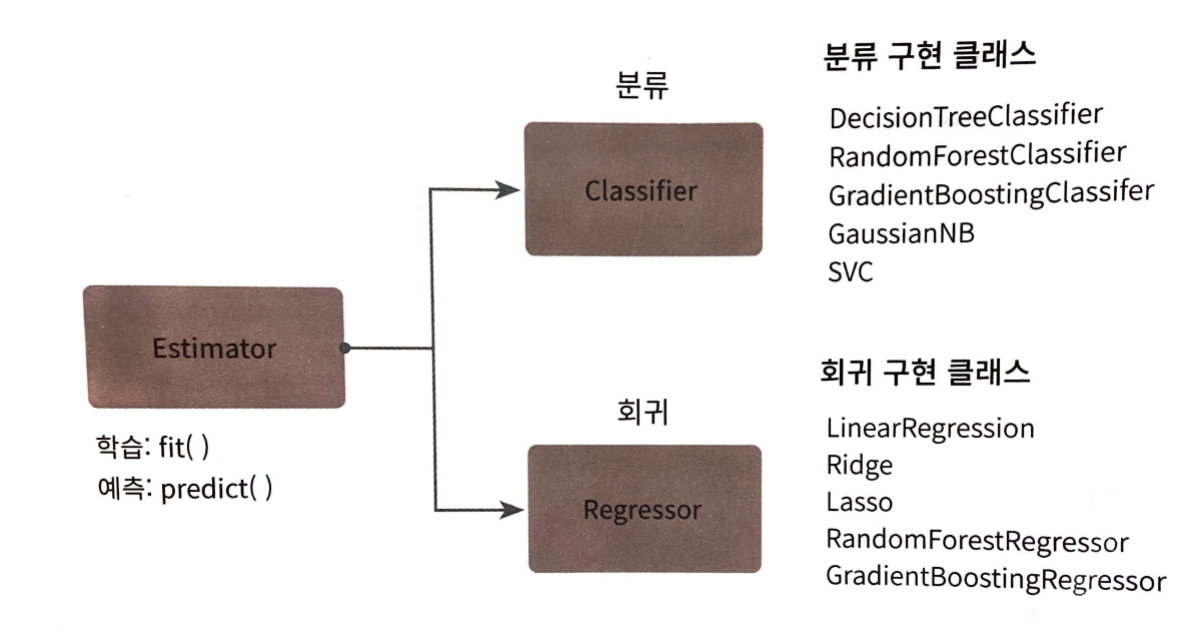

In [2]:
from IPython.display import Image

Image("C:/Users/user/Desktop/데분동아리/11.png") 

In [ ]:
iris=load_iris()

iris_data=iris.data # 
iris_label=iris.target # iris species 


iris_df = pd.DataFrame(iris_data, columns=iris.feature_names )
iris_df["label"]=iris.target
iris_df.head()

iris의 feature : sepal length (cm)	sepal width (cm)	petal length (cm)	petal width (cm)
iris의 target : label(0,1,2)

# [train_test_split]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

X_train.shape # 150 *0.8=120

(120, 4)

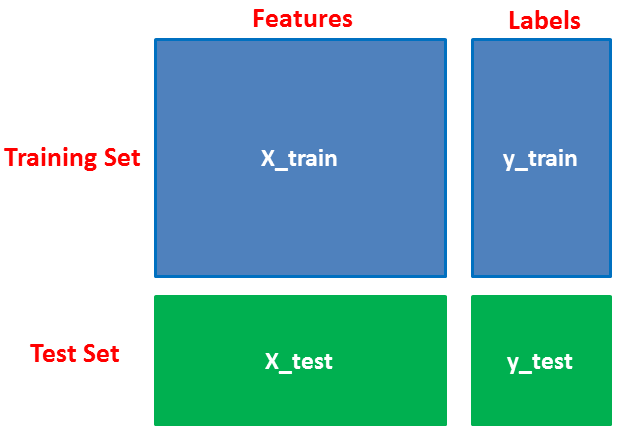

In [15]:
from IPython.display import Image

Image("C:/Users/rhtn2/OneDrive/바탕 화면/데이터분석동아리/사이킷런 발표/머신러닝기본.png") 

----------------
**train_test_split(feature, target, test_size, train_size, random_state, shuffle)**

- test_size : 테스트 데이터 세트 크기를 얼마로 샘플링 할 것인지 결정. 디폴트=0.25
- train_size : 학습용 데이터 세트 크기를 얼마로 샘플링 할 것인지 결정. 디폴트=0.75 (test_size를 통상적으로 사용)
- random_state : 난수를 고정적으로 발생시키는 parameter
- shuffle : 데이터를 분리하기 전 데이터를 미리 섞을지 여부 결정. 디폴트 : True

In [17]:
dt_clf = DecisionTreeClassifier(random_state=11) # dataype : estimator class

dt_clf.fit(X_train, y_train) # 학습수행

pred=dt_clf.predict(X_test) # 학습된 모듈로 test데이터셋 예측시행

from sklearn.metrics import accuracy_score

print(pred)
print(y_test)
print(accuracy_score(y_test, pred),"%")

[2 2 1 1 2 0 1 0 0 1 1 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1]
[2 2 2 1 2 0 1 0 0 1 2 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1]
0.9333333333333333 %


----------
## [교차검증]
: 과적합 방지하기 위해 모델링 학습을 여러번 반복하는 수행  

* 과적합 : 모델이 학습데이터에만 과도하게 최적화 되어, 다른 데이터에 대한 예측 성능이 과도하게 떨어지는 것



###  < K 폴드 교차 검증 > 
: K 개의 데이터 폴드 세트를 만들어 K 번 만큼 각 폴트에 학습과 검증 평가를 반복적으로 수행하는 방법

사이킷런에서 재공하는 클래스 : **KFold, StratifiedKFold**


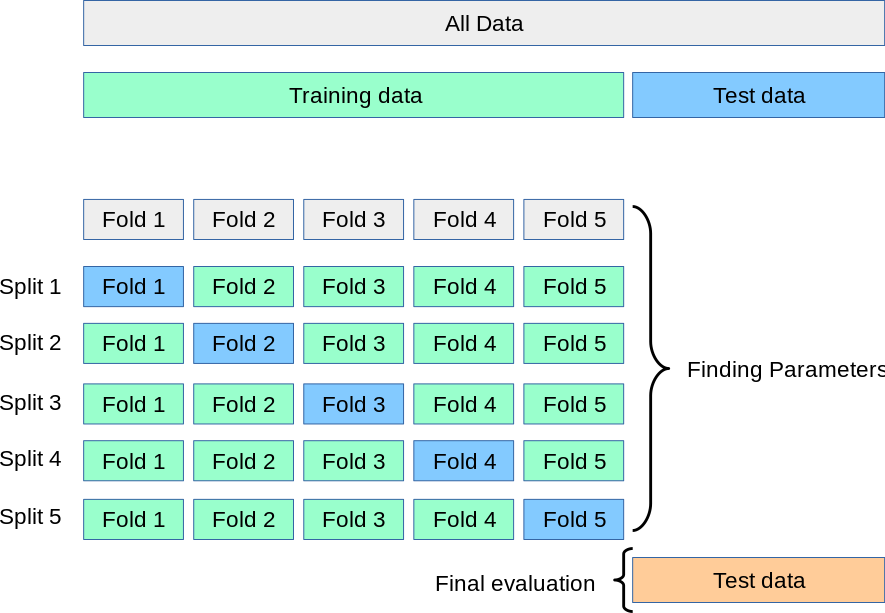

In [18]:
from IPython.display import Image
Image("C:/Users/rhtn2/OneDrive/바탕 화면/데이터분석동아리/사이킷런 발표/Kfold.png") 

In [19]:
from sklearn.model_selection import KFold


iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:',features.shape[0])


붓꽃 데이터 세트 크기: 150


**<u>KFold 클래스 활용하기</u>**

**split()** : 학습용/검증용 데이터로 분할할 수 있는 인덱스 반환
    - 필요 이유 : 실제 학습용/검증요 데이터 추출을 시행할 때 인덱스를 기반으로 개발코드에서 직접 수행하기 때문
 
 

In [20]:

n_iter = 0

for train_index, test_index in kfold.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    #학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    n_iter += 1
    
    #반복 시마다 정확도 예측
    accuracy = np.round(accuracy_score(y_test,pred),4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print('\n#{0} 교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size)) 
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))

    cv_accuracy.append(accuracy)

#개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))    



#1 교차 검증 정확도: 1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도: 0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도: 0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도: 0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도: 0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


iris data size : 150
    -> 150 / 5 = 30
    
0-29, 30-59, 60-89, 90-119,120-149 로 인덱스를 분할하여 모델학습 반복 함을 보여준다

-------------
### <Stratified K 폴드>
- 원본데이터의 레이블 분포도 특성을 반영하여 KFold 시행
- 각 레이블의 분포 퍼센트에 맞춰서 train test 데이터셋을 구성
- 왜곡된 레이블 데이터 분포도를 반영하지 못하는 KFold의 단점 보완
- 주로 분류에서의 교차검증에서 사용
        
        
    
ex) **균등한 분포도**를 가진 레이블데이터이지만 **레이블이 sorted 된 경우** : iris data

In [21]:
import pandas as pd 

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

In [22]:
iris_df["label"].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
kfold = KFold(n_splits=3)
n_iter=0
# KFold를 3번 진행할 때, 각 폴드에서 라벨이 어떻게 학습,테스트 데이터로 분류되었는지 보여줌
for train_index, test_index in kfold.split(iris_df):
    n_iter+=1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'] .iloc[test_index]
    print("## 교차검증 : {0}".format(n_iter))
    print('학습 레이블 데이터 분포 : \n',label_train.value_counts())
    print('검증 레이블 데이터 분포 : \n',label_test.value_counts())      

## 교차검증 : 1
학습 레이블 데이터 분포 : 
 2    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 0    50
Name: label, dtype: int64
## 교차검증 : 2
학습 레이블 데이터 분포 : 
 2    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 1    50
Name: label, dtype: int64
## 교차검증 : 3
학습 레이블 데이터 분포 : 
 1    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 2    50
Name: label, dtype: int64



> 이러한 결과가 나오는 이유는 iris데이터의 레이블이 섞여 있지 않고 0 50개 1 50개 2 50개가 순차적으로 나열되어 있기 때문이다. 

>*(KFold가 이뤄지는 과정을 설명한 그림을 다시 생각해보자!)*

#### --->> 해결책 : StratifiedKFold

In [24]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_ilter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1 
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print("## 교차검증 : {0}".format(n_iter))
    print('학습 레이블 데이터 분포 \n', label_train.value_counts())
    print('검증 레이블 데이터 분포 \n', label_test.value_counts())

## 교차검증 : 4
학습 레이블 데이터 분포 
 2    34
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포 
 1    17
0    17
2    16
Name: label, dtype: int64
## 교차검증 : 5
학습 레이블 데이터 분포 
 1    34
2    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포 
 2    17
0    17
1    16
Name: label, dtype: int64
## 교차검증 : 6
학습 레이블 데이터 분포 
 0    34
2    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포 
 2    17
1    17
0    16
Name: label, dtype: int64


> 각 레이블이 균일하게 분배된 것을 볼 수 있다.

**↓ 동일한 iris 데이터로 StratifiedKFold를 통해 교차 검증 시행**


In [25]:
df_clf = DecisionTreeClassifier(random_state=156)

skfold=StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# StratifiedKFold 의 split() 호출시 반드시 레이블 데이터 세트로 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
    # split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    # 반복 시마다 정확도 측정
    n_iter += 1 
    
    accuracy = np.round(accuracy_score(y_test, pred),4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기: {3}' 
          . format(n_iter, accuracy, train_size, test_size) )
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    
    # 교차 검증별 정확도 및 평균 정확도 계산
    print('\n## 교차 검증별 정확도 : ', np.round(cv_accuracy, 4))
    print('## 평균 검증 정확도 : ', np.mean(cv_accuracy))


#1 교차 검증 정확도 : 0.98, 학습 데이터 크기 : 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

## 교차 검증별 정확도 :  [0.98]
## 평균 검증 정확도 :  0.98

#2 교차 검증 정확도 : 0.94, 학습 데이터 크기 : 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

## 교차 검증별 정확도 :  [0.98 0.94]
## 평균 검증 정확도 :  0.96

#3 교차 검증 정확도 : 0.98, 학습 데이터 크기 : 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도 :  [0.98 0.94 0.98]
## 평균 검증 정확도 :  0.9666666666666667


------------
### <cross_val_score()>

- 교차검증을 쉽게 수행하는 API
- 기존의 KFold 수행방법 : 폴드세트설정->for루프로 인덱스추출->반복 학습/예측->예측 성능 반환 
- 이 모든 것을 한번에~! = cross_val_score()~!

**corss_val_score(estimator, X, y=None, scoring=None, cv=None, n_job=1, verbose=0, fit_parameter=None, pre_dispatch='2×n_jobs')**
    - 주요 parameter : estimator, X, y, scoring, cv
    - parameter = ~~ : 디폴트값 
- estimator : 사이킷런 분류 알고리즘 클래스 Classifer or 회귀 알고리즘 클래스 Regressor 입력공간
- X: feature 데이터세트
- y : label 데이터세트
- scoring : 예측 성능 평가 지표
- cv : 교차검증 폴드 수 (K)
- 반환값 : 각 시행의 섣능 지표 측정값을 배열 형태로 반환
- 기본적으로 StratifiedKFold를 시행 (회귀인 경우 KFold) 

</b>


**↓ 위와 동일한 시행 by cross_val_score()**


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn. metrics import accuracy_score

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuarcy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))


교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


**<u>참고</u>**  
**cross_validate()** : 여러개의 평가 지표와 평가 수행시간까지 제공하는 API  
이런게 있대요 ^.^...

----------------
------------------

## [GridSearchCV - 교차검증 & 최적 하이퍼 파라미터 튜닝]



☆ **하이퍼 파라미터?**  

    : 머신러닝 알고리즘을 구성하는 주요소, 이 값의 조정을 통해 예측 성능 개선  
    ->'최적' 하이퍼 파라미터 - 예측 성능을 최대로 만들어주는 파라미터, 절대적 x  
     
     
☆ **하이퍼파라미터 vs 파라미터**  
   
   **하이퍼파라미터** : 모델링시 사용자가 직접 설정하는 변수값 ex) KFold 에서의 K(반복횟수)값  
   
   **파라미터** : 데이터에 의해 내부적으로 정의되는 값 ex)평균, 분산 ...
   
   
   ### <GridSearchCV()>
   
 - 교차 검증 기반으로 하이퍼 파라미터의 최적값을 찾는 API
 - 사용자가 설정한 하이퍼 파라미터들로 만들 수 있는 모든 경우를 순차적으로 교차검증 실행
 - 수행시간이 오래걸림 
     ex) parameterA : 1, 2, 3  / parmeterB : 1, 2 / K : 3 -> 3×2×3 = 18번의 학습/평가 진행  
     
     
 **GridSearchCV() 주요 변수들**
 
<center>변수</center>|입력내용|<center>입력타입</center>
---|:---:|---:
estimator | 평가 대상|classifier(분류), regressor(회귀), pipeline(순차실행?)
param_grid |하이퍼 파라미터| <center>딕셔러니</center>
scoring|예측성능평가방법|<center>평가지표 문자열 / 함수</center>
cv|분할 세트 수(K)||
refit=True|<center>최적의 하이퍼파라미터를 찾은 뒤 재학습 시킬 여부</center>




**↓ 예제**




In [27]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

#데이터를 로딩하고 학습 데이터와 텍스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=121)

dtree = DecisionTreeClassifier()

### 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth': [1, 2, 3], 'min_samples_split':[2, 3]}

#param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행설정
### refit = True가 default임. True이면 가장 좋은 파라미터 설정으로 재학습시킴
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

#불꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

#GridsearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score',\
           'rank_test_score','split0_test_score', 'split1_test_score', 'split2_test_score']]
    

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


> 4,5번 째 하이퍼파라미터쌍이 mean_test_scored은 0.975, rank_test_score이 1로  
다른 하이퍼파라미터쌍에 비해 최적의 값이란 것을 알 수 있다. 

> 최적의 하이퍼파라미터-  max_depth : 3 / min_samples_split : 2 or 3

**결과값 반환 속성**

위 예시처럼 경우의 수가 적으면 표로 파악할 수 있지만 경우의 수가 크면 한눈에 파악 어려움  

**->** GridSearchCV 객체의 fit() 수행 후 최적의 하이퍼파라미터 값과 그때의 결과 값이 (cv_results의 rank_test_score==1의 값) 

**best_params_, best_score_** 속성에 기록됨  



In [28]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9750


마찬가지로  
**refit=True** 파라미터로 인해 최적의 하이퍼파라미터에 의한 재학습 결과 또한 **best_estimator_**로 저장함

In [29]:
#GridSearchCV의 Refit을 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

#GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:4f}'.format(accuracy_score(y_test, pred)))


테스트 데이터 세트 정확도: 0.966667


## [데이터 전처리]
- 결손값, 이상값 등을 삭제 혹은 조정
- 데이터분석이 용이하도록 값의 범위를 조정하거나 단위를 일치시키는 것
- 불필요한 feature 판단 및 삭제
- 등

### [데이터터 인코딩]
: 문자열로 이루어진 라벨을 수치화(인코딩)하는 작업  

사이킷런에서 제공하는 클래스 : **LabelEncoder, OneHotEncoder**

### <LabelEnconder : 레이블 인코딩> 
: 문자열 레이블 -> 숫자

- fit() 으로 변환속성 학습 -> transform() 으로 변환 (이후의 전처리 클래스들도 같은 방식을 취함)

In [40]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:' , labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


**classes_** : 인코딩 전 문자열을 보여주는 속성값


**inverse_transform()** : 인코딩 되돌리기 (디코딩)

In [41]:
print('인코딩 클래스:',encoder.classes_)
print('디코딩 원본값:', encoder.inverse_transform([4,5,2,0,1,1,3,3]))


인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


- 한계 : 숫자 값이 크고 작은 특성으로 인해 선형회귀와 같은 ML알고리즘에선 가중치를 부여할 수 있음 -> 정확도 하락
    -> Solution : One-Hot Encoding
    

### <OneHotEncoder : 원-핫 인코딩>
: 피쳐값의 유형에 따라 새로운 피쳐열을 추가하여 해당 고유값에 매칭되는 피쳐만 1, 나머지는0을 반환하는 인코딩

![onehot](https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile24.uf.tistory.com%2Fimage%2F99CBF7365BA51C322BB97E)

**사용시 유의점**
- 문자열 카테고리 값을 숫자형으로 반환 하여 사용하야함
- 반드시 2차원 이상의 자료형이 입력되어야 함



In [42]:
from sklearn.preprocessing import OneHotEncoder

labels=labels.reshape(-1,1) # 앞서 레이블 인코딩 결과(1차원 array)를 2차원으로 변환
oh_encoder =  OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print(oh_labels.toarray())


[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


### <get_dummies()> : 원-핫 인코딩을 더 쉽게
원-핫 인코딩에서 문자열 카테고리를 숫자형으로 변환할 필요 없이 바로 인코딩을 진행할 수 있는 API


In [43]:
df=pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)


,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


## [피쳐 스케일링과 정규화]

**피처스케일링** : 서로 다른 변수 값 범위를 일정한 수준으로 맞추는 작업

- 표준화 : 평균이 0 이고 분산이 1 인 '가우시안 정규 분포'를 가진 값으로 변환 -> **StandardScaler**
- 정규화 : 서로 다른 피처의 크기를 통일하기 위해 크기를 (0,1)구간에 속하도록 변환 -> **MinMaxScalrer**
- 벡터정규화 : 선형대수에서의 정규화 개념, 개별 벡터를 모든 치퍼 벡터의 크기로 나눠주는 것 -> **Nomalize** (안다룸)

### <StandardScaler : 표준화>
- 평균이 0, 분산이 1인 가우시안 정규 분포 값으로 변환
- 선형회귀나 로지스틱 회귀시 주로 사용
- 이상값에 민감함
- 변환 반환 데이터형태 ndarray


In [47]:
# 원래 iris데이터의 평균과 분산 확인

iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())


feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [51]:
from sklearn.preprocessing import StandardScaler

#StandardScaler객체 생성
scaler = StandardScaler()
#StandardScaler로 데이터 세트 변환. fit()과 trnasform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#to dataframe
iris_df_scaled = pd.DataFrame(iris_scaled, columns=iris.feature_names)
print('feature들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())


feature들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


> 각 피처의 평균이 0에 근사하게 변환 되었고, 분산 또한 1에 근사하게 변환 됨을 볼 수 있다.


### <MinMaxScaler : 정규화>
- 데이터값을 0과1사이의 범위값으로 변환
- 가우시안 분퐈가 아닐 경우 
- 이상값에 민감
- 변환 반환 데이터형태 ndarray

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('feature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### * StandardScaler 과 MinMaxScaler 의 활용

둘 다 이상값에 민감하다는 단점을 가지고 있지만 StandardScaler보타 MinMaxScaler이 좀 더 원본 데이터의 분포를 잘 유지하며 값의 반환을 함

> 1번 열 ; 원본 데이터의 분포  
> 2번 열 : MinMaxScaler 변환  
> 4번 열 : StandardScaler 변환  

![StandardScaler,MinMaxScaler1](https://mkjjo.github.io/img/posting/2019-01-10-001-ex1.PNG)
![StandardScaler,MinMaxScaler2](https://mkjjo.github.io/img/posting/2019-01-10-001-ex2.PNG)
![StandardScaler,MinMaxScaler3](https://mkjjo.github.io/img/posting/2019-01-10-001-ex3.PNG)
![StandardScaler,MinMaxScaler4](https://mkjjo.github.io/img/posting/2019-01-10-001-ex4.PNG)

 

### * 머신러닝 학습에서 스케일링 변환시 유의점

Scaler객체로 학습데이터 세트에 fit()과 transform()을 적용하였으면, 테스트 데이터 세트에 다시 fit()을 적용 하지 않고 바로 transform()을 시행해야 같은 데이터 값에 대해서 같은 변환 값을 갖는다.  

만약 테스트 데이터에서 다시 fit()을 통해 학습을 할 시 스케일링 기준정보가 달라져 같은 데이터 값에 학습 데이터 세트와는 다른 기준정보가 새로 학습 되기 때문이다.  

이런 문제가 발생하는 이유는 Scaler객체에 fit()을 통해 변환 학습하면 그 객체에 변환 기준정보가 저장되는 것이기 때문


In [55]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
#scaler 클래스의 fit(), transform()dms 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array = np.arange(0, 6).reshape(-1, 1)

#MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

#fit()하게 되면 train_array 데이터와 최솟값이 0, 최댓값이 10으로 설정
scaler.fit(train_array)
#1/10 scale로 train_array 데이터 변환함. 원본 10->1로 변환됨.
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터 :', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터 :', np.round(train_scaled.reshape(-1), 2))


원본 train_array 데이터 : [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터 : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


> 각 데이터를 1/10 하는 변환 기준 정보를 저장하여 변환함

In [57]:
#MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)
#1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.
test_scaled = scaler.transform(test_array)
#test_array의 scale 변환 출력.
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터: ', np.round(test_scaled.reshape(-1),2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터:  [0.  0.2 0.4 0.6 0.8 1. ]


> 학습 데이터를 통해 얻은 알고리즘으로 테스트 데이터에도 적용이 되야 하는데  
> fit()을 테스트 데이터에서 다시 적용 함으로써 변환 기준이 다시 설정되어 같은 데이터 값에 대해서 다른 변환값을 갖게 됨  

> ex) 학습데이터 : 5->0.5 / 테스트데이터 : 5->1

**따라서 이러한 요류를 범하지 않기 위해 test 데이터에 대해서는 fit()을 통해 학습을 진행하면 안됨**

In [60]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터 :', np.round(train_array.reshape(-1),2))
print('scale된 train_array 데이터 :', np.round(train_scaled.reshape(-1),2))

test_scaled = scaler.transform(test_array)
print('원본 test_array 데이터 :', np.round(test_array.reshape(-1),2))
print('scale된 test_array 데이터 :', np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터 : [ 0  1  2  3  4  5  6  7  8  9 10]
scale된 train_array 데이터 : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
원본 test_array 데이터 : [0 1 2 3 4 5]
scale된 test_array 데이터 : [0.  0.1 0.2 0.3 0.4 0.5]


**<정리>**

1. 가능하면 전체 데이터의 스케일링을 먼저 적용 한 뒤 학습/테스트 데이터로 분리하자
1. 1 이 불가능하다면 테스트 데이터에 대해서는 fit()이나 fit_trasform()을 적용 하지 말자

# TITANIC

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir("C:/Users/user/Desktop/DATA/Titanic")
ti = pd.read_csv('train.csv')
ti.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
ti['Age'].fillna(ti['Age'].mean(), inplace=True)
ti['Cabin'].fillna('N', inplace=True)
ti['Embarked'].fillna('N', inplace=True)
print(ti.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [19]:
from sklearn import preprocessing

def encode_feature(df):
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df

ti = encode_feature(ti)
ti.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,146,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,146,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,146,3


In [51]:
from sklearn.preprocessing import MinMaxScaler

ti.af = ti.loc[:,['Age','Fare']]
scaler = MinMaxScaler()
scaler.fit(ti.af)
ti_scaled = scaler.transform(ti.af)

ti_scaled

array([[0.27117366, 0.01415106],
       [0.4722292 , 0.13913574],
       [0.32143755, 0.01546857],
       ...,
       [0.36792055, 0.04577135],
       [0.32143755, 0.0585561 ],
       [0.39683338, 0.01512699]])

In [26]:
tr = ti.loc[:,['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']]
target = ti['Survived']
print("X")
print(tr.head())
print("target")
print(target)


X
   Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked
0       3    1  22.0      1      0   7.2500    146         3
1       1    0  38.0      1      0  71.2833     81         0
2       3    0  26.0      0      0   7.9250    146         3
3       1    0  35.0      1      0  53.1000     55         3
4       3    1  35.0      0      0   8.0500    146         3
target
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


## train_test_split in TITANIC

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tr,target,test_size=0.2,random_state=203)

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn. metrics import accuracy_score

In [47]:
dt_clf=DecisionTreeClassifier(random_state=203)
rf_clf=RandomForestClassifier(random_state=203)
lr_clf=LogisticRegression()

def accuracy(X,y,XT,yt):
    acc = []
    
    dt_clf.fit(X,y)
    dt_pred = dt_clf.predict(XT)
    acc.append(accuracy_score(yt,dt_pred))
    
    rf_clf.fit(X,y)
    rf_pred = rf_clf.predict(XT)
    acc.append(accuracy_score(yt,rf_pred))
    
    lr_clf.fit(X,y)
    lr_pred = lr_clf.predict(XT)
    acc.append(accuracy_score(yt,lr_pred))
    
    return acc

accuracy(X_train,y_train,X_test,y_test)
    

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0.7821229050279329, 0.8379888268156425, 0.776536312849162]

# KFOLD

In [46]:
from sklearn.model_selection import KFold

def exec_kfold(clf,folds=5):
    kfold = KFold(n_splits=folds)
    
    scores =[]
    
    for train_index, test_index in kfold.split(tr):
        X_tr, X_te = tr.values[train_index], tr.values[test_index]
        y_tr, y_te = target.values[train_index], target.values[test_index]
    
    #학습 및 예측
        clf.fit(X_tr, y_tr)
        pred = clf.predict(X_te)
        
        acc = accuracy_score(y_te,pred)
        scores.append(acc)
    ms = np.mean(scores)
    return ms

exec_kfold(dt_clf, folds=5)

0.7845458539953549

# CROSS_VAL_SCORE

In [54]:
from sklearn.model_selection import cross_val_score, cross_validate


# 성능 지표는 정확도(accuarcy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, tr, target, cv=5)
print(scores)

[0.74860335 0.76404494 0.83146067 0.75280899 0.80337079]


# GridSearchCV

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tr,target,test_size=0.2,random_state=203)


### 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth': [2,3,5,10], 'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy',cv=5)

grid_dclf.fit(X_train,y_train)


print(grid_dclf.best_params_)
print(grid_dclf.best_score_)

{'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.814596670934699


In [78]:
best_dclf = grid_dclf.best_estimator_
a = best_dclf.predict(X_test)
acc = accuracy_score(y_test,a)
acc

0.8044692737430168